In [1]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"c:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from distribution_operation import *
from utils import *
from numerical_routine import *
from posterior_computation import *
from ash import *

In [2]:
betahat=  np.array([1,2,3,4,5])
sebetahat=np.array([1,0.4,5,1,1])

res= ash(betahat, sebetahat)

In [3]:
true_val1=  np.random.normal(loc=0, scale=2, size=100)
true_val0=  np.zeros( 100)

observations_mu_1 =true_val1+np.random.normal(loc=0, scale=1, size=100)
observations_mu_0 =true_val0+ np.random.normal(loc=0, scale=1, size=100)
# Combine them into one array
betahat = np.hstack([observations_mu_1, observations_mu_0])
sebetahat=  np.repeat(1, betahat.shape[0])
mult=1.5

In [4]:
res= ash(betahat, sebetahat, prior="exp")
print(res.pi) 

[8.55825310e-01 3.67574525e-04 9.78707762e-05 2.72614448e-05
 9.38129394e-06 5.57409911e-06 9.73381077e-06 8.01700242e-05
 2.18958147e-03 4.22686670e-02 9.38587160e-02 5.25762269e-03
 2.53702177e-06 6.90085628e-12 1.06241438e-18 1.06241438e-18]


Text(0, 0.5, 'posterior mean')

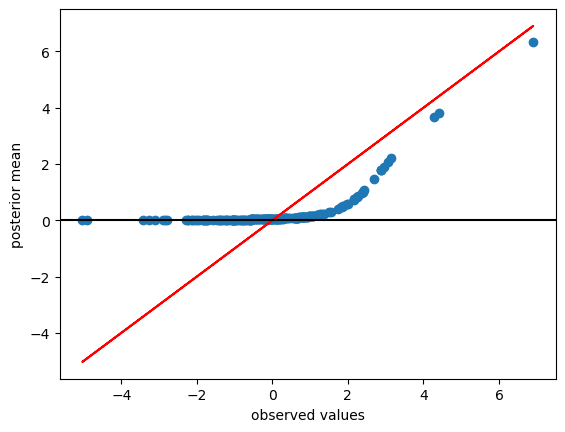

In [5]:
plt.scatter(betahat, res.post_mean  )
plt.xlabel("observed values")
plt.plot(betahat, betahat, color='red', label='x = y')
plt.axhline(y=0, color="black")
plt.ylabel("posterior mean")